In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.4 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.2


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
bdata = sc.read_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj_230622.h5ad')
bdata

AnnData object with n_obs × n_vars = 68683 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [4]:
list(set(bdata.obs['celltype_B_corrected'].unique()))

['doublet',
 'B_ASC_IgM',
 'B_CD11c',
 'B_ASC_other',
 'B_switched_mem',
 'B_non-switched_mem',
 'B_naive',
 'B_ASC_IgG',
 'B_ASC_dividing',
 'B_ASC_IgA']

In [5]:
bdata = bdata[bdata.obs['celltype_B_corrected'] != 'doublet'].copy()

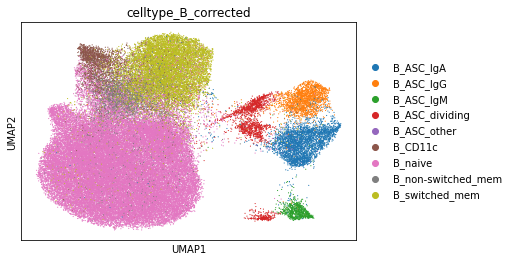

In [6]:
sc.pl.umap(bdata, color = 'celltype_B_corrected', size = 5)

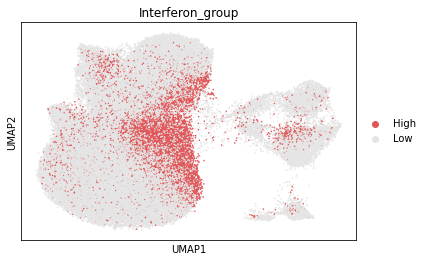

In [7]:
sc.pl.umap(bdata, color = 'Interferon_group', palette = {'Low':'#e5e5e5', 'High':'#e15759'}, size = 10)

In [8]:
# remove doublets
bdata = bdata[(bdata.obs['merged_souporcell_status'] == 'singlet') & (bdata.obs['celltype_B_corrected'] != 'doublet')].copy()
# remove the unannotated samples
bdata = bdata[(bdata.obs['sample_id'] != 'NA') & (~bdata.obs['patient_id'].isin(['NULL', 'unresolved'])) & (bdata.obs['case_control'] != 'NA')].copy()
bdata

AnnData object with n_obs × n_vars = 59643 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [9]:
bdata.obs['celltype_B_corrected_case_control'] = [a + '_' + b for a,b in zip(bdata.obs['celltype_B_corrected'], bdata.obs['case_control'])]

In [14]:
bcells = bdata[~bdata.obs['celltype_B_corrected'].isin(['B_CD11c', 'B_ASC_IgA','B_ASC_IgG','B_ASC_IgM','B_ASC_dividing','B_ASC_other',])].copy()
bcells

AnnData object with n_obs × n_vars = 51301 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

... storing 'celltype_B_corrected_case_control' as categorical


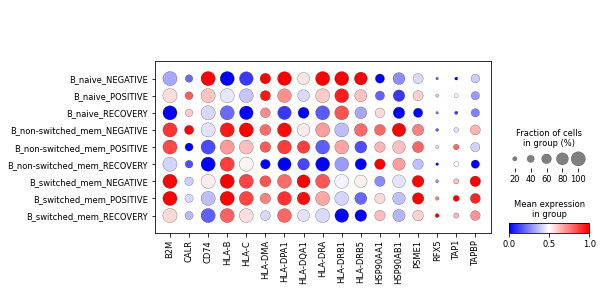

In [15]:
genes = ['B2M', 'CALR', 'CD74', 'HLA-B', 'HLA-C', 'HLA-DMA', 'HLA-DPA1', 'HLA-DQA1', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', 'HSP90AA1', 'HSP90AB1', 'PSME1', 'RFX5', 'TAP1', 'TAPBP',]
sc.pl.dotplot(bcells, genes, groupby = 'celltype_B_corrected_case_control', standard_scale = 'var', color_map = 'bwr')

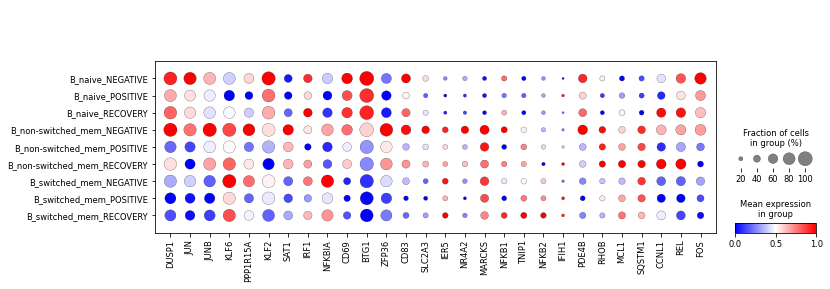

In [16]:
genes2 = ['DUSP1','JUN','JUNB','KLF6','PPP1R15A','KLF2','SAT1','IRF1','NFKBIA','CD69','BTG1','ZFP36','CD83','SLC2A3','IER5','NR4A2','MARCKS','NFKB1','TNIP1','NFKB2','IFIH1','PDE4B','RHOB','MCL1','SQSTM1','CCNL1','REL','FOS',]
sc.pl.dotplot(bcells, genes2, groupby = 'celltype_B_corrected_case_control', standard_scale = 'var', color_map = 'bwr')

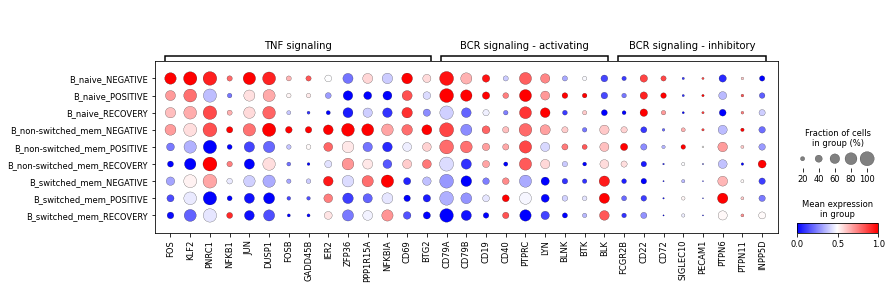

In [19]:
genes = {
    'TNF signaling':["FOS", "KLF2", "PNRC1", "NFKB1", "JUN", "DUSP1", "FOSB", "GADD45B", "IER2", "ZFP36", "PPP1R15A", "NFKBIA", "CD69", "BTG2"],
    'BCR signaling - activating':['CD79A', 'CD79B', 'CD19', 'CD40', 'PTPRC', 'LYN', 'BLNK', 'BTK', 'BLK'],
    'BCR signaling - inhibitory':['FCGR2B', 'CD22', 'CD72', 'SIGLEC10', 'PECAM1', 'PTPN6', 'PTPN11', 'INPP5D']
}
sc.pl.dotplot(bcells, genes, groupby = 'celltype_B_corrected_case_control', 
              standard_scale = 'var', var_group_rotation =0, color_map = 'bwr')